In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sb
from KNN_main import KNN

In [47]:
female_data = pd.read_csv("ANSUR II FEMALE Public.csv")
male_data = pd.read_csv("ANSUR II MALE Public.csv", encoding="latin-1")
data = pd.concat([female_data, male_data])

In [48]:
data["weightkg"] = data["weightkg"] / 10
data["stature"] = data["stature"] / 10
data["Gender"] = data["Gender"].replace(["Female", "Male"], [0, 1])

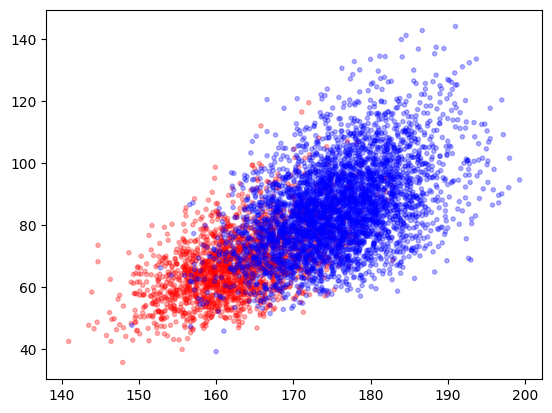

In [49]:
cmap = ["red", "blue"]
plt.scatter(data["stature"], data["weightkg"], c=data["Gender"], marker=".", cmap=ListedColormap(cmap), alpha=0.3)

In [50]:
X_train = np.array(data[["stature" , "weightkg" , "Age"]][:int((len(data[["stature" , "weightkg" , "Age"]])/100)*80)])
X_test = np.array(data[["stature" , "weightkg" , "Age"]][:int((len(data[["stature" , "weightkg" , "Age"]])/100)*20)])
Y_train = np.array(data["Gender"][:int((len(data[["stature" , "weightkg" , "Age"]])/100)*80)])
Y_test = np.array(data["Gender"][:int((len(data[["stature" , "weightkg" , "Age"]])/100)*20)])

knn = KNN(5)
knn.fit(X_train , Y_train)

In [51]:
new_1 = np.array([180, 85, 36])
new_2 = np.array([160, 50, 14])
new_list = [new_1 ,new_2]

In [52]:
outputs = knn.predict(new_list)
for y in outputs :
    if y == 0:
        print("female")
    elif y == 1:
        print("male")

male
female


In [53]:
knn.evaluate(X_test, Y_test)

0.8516075845012366

(array([  7.,  18., 116., 274., 493., 489., 330., 175.,  69.,  15.]),
 array([140.9, 145.1, 149.3, 153.5, 157.7, 161.9, 166.1, 170.3, 174.5,
        178.7, 182.9]),
 <BarContainer object of 10 artists>)

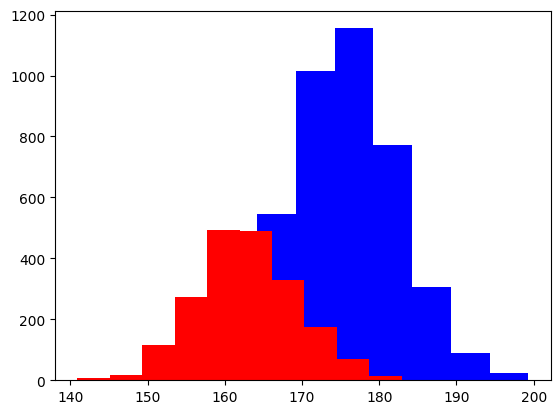

In [55]:
plt.hist(data.query("Gender == 1")["stature"] ,color= "blue")
plt.hist(data.query("Gender == 0")["stature"] ,color = "red")

In [56]:
_, testing_data = train_test_split(data[['weightkg','stature','Gender']])
testing_data

,weightkg,stature,Gender
236,97.1,183.0,1
3947,87.0,174.8,1
320,46.8,158.4,0
664,82.1,170.2,1
3252,89.0,169.5,1
...,...,...,...
3939,95.0,178.8,1
3192,78.4,173.0,1
2408,118.1,176.5,1
2927,69.4,164.8,1


In [97]:
for i in [3, 5, 7, 9]:
    knn = KNN(i)
    knn.fit(X_train , Y_train)
    print(f"k = {i} -> {knn.evaluate(X_test, Y_test)}")

k = 3 -> 0.8705688375927453
k = 5 -> 0.8516075845012366
k = 7 -> 0.830997526793075
k = 9 -> 0.8227535037098104


In [98]:
for k in [3, 5, 7, 9]:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, Y_train)
    print(f"k = {k} -> {knn.score(X_test, Y_test)}")

k = 3 -> 0.8713932399010718
k = 5 -> 0.8507831821929102
k = 7 -> 0.830997526793075
k = 9 -> 0.8227535037098104


In [77]:
CM = np.zeros((2,2))

for i in range(int((len(data[["stature" , "weightkg" , "Age"]])/100)*20)):
    if y_test[i] == 0 and Y_preds[i] == 0:
        CM[0][0] += 1
    elif y_test[i] == 0 and Y_preds[i] == 1:
        CM[0][1] += 1
    elif y_test[i] == 1 and Y_preds[i] == 0:
        CM[1][0] += 1
    elif y_test[i] == 1 and Y_preds[i] == 1:
        CM[1][1] += 1
    
CM

array([[1063.,  150.],
       [   0.,    0.]])

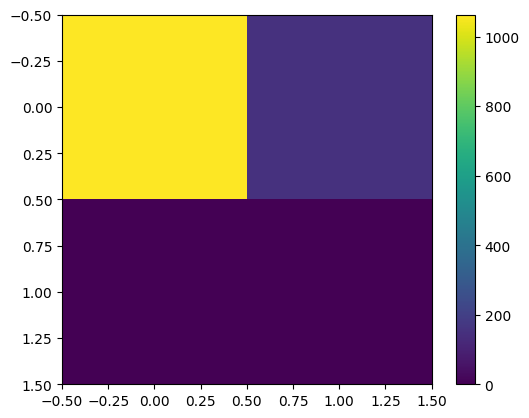

In [79]:
plt.imshow(CM)
plt.colorbar()
plt.show()